In [1]:
#import and process Dow Jon Futures history 
import pandas as pd
from pprint import pprint

pf = pd.read_json("historyIndex.json")
#add one more label column in the each row (Last day)
futuresData = pd.DataFrame(columns=pf['dataset']['column_names'], data = pf['dataset']['data'])
futuresData = futuresData.iloc[::-1]
futuresData.index = range(len(futuresData))
y = futuresData.loc[1:2630, ['Last']]
y.index = range(len(y))
y.columns = ['Next Day Last']
futuresData = pd.merge(futuresData, y, left_index=True, right_index=True)
futuresData.drop(['Change'], axis = 1, inplace = True, errors = 'ignore')

In [2]:
#import and process the sentiment of the reddit sumissions title
newsData = pd.read_csv("mean_sentiment_tfidf14.csv")
# sentimentData.columns=['Date','neg','neu','pos','compound']
futuresData.columns=['date', 'Open', 'High', 'Low', 'Last', 'Settle', 'Volume',
       'Previous Day Open Interest', 'Next Day Last']

In [3]:
#merge imported data
dataset = newsData.merge(futuresData, on='date', how='left')
dataset = dataset.dropna(how='any')  #TODO
dataset.index = range(len(dataset))
dataset = dataset.drop(["Last"],axis=1) #TODO
dataset

,date,score,num_comments,neg,neu,pos,compound,000,10,100,...,year,years,york,Open,High,Low,Settle,Volume,Previous Day Open Interest,Next Day Last
0,2012-11-13,583.2,111.1,0.0976,0.8766,0.0258,-0.23890,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12777.0,12855.0,12684.0,12717.00,138310.0,101101.0,12544.00
1,2012-11-14,590.2,107.0,0.1501,0.8095,0.0404,-0.25605,0.000000,0.000000,0.000000,...,0.000000,0.042984,0.000000,12731.0,12803.0,12509.0,12544.00,167420.0,101005.0,12522.00
2,2012-11-15,561.3,131.4,0.1332,0.7952,0.0716,-0.19940,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12545.0,12581.0,12464.0,12522.00,152927.0,101319.0,12570.00
3,2012-11-16,416.2,103.3,0.1469,0.8045,0.0487,-0.21828,0.000000,0.000000,0.053069,...,0.000000,0.040858,0.000000,12520.0,12573.0,12434.0,12570.00,167779.0,100484.0,12738.00
4,2012-11-19,479.1,69.7,0.2267,0.7021,0.0712,-0.31749,0.000000,0.000000,0.062000,...,0.000000,0.047733,0.000000,12579.0,12764.0,12573.0,12738.00,126099.0,94345.0,12759.00
5,2012-11-20,406.0,74.3,0.1351,0.7699,0.0950,-0.07062,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,12733.0,12777.0,12666.0,12759.00,122895.0,95051.0,12800.00
6,2012-11-21,490.8,99.4,0.1228,0.7683,0.1089,0.04511,0.051445,0.000000,0.000000,...,0.000000,0.065333,0.000000,12757.0,12813.0,12696.0,12800.00,82562.0,95921.0,12961.00
7,2012-11-23,519.6,76.9,0.1791,0.7749,0.0460,-0.20363,0.060355,0.000000,0.000000,...,0.000000,0.000000,0.000000,12802.0,12982.0,12801.0,12961.00,61917.0,96069.0,12936.00
8,2012-11-26,455.4,73.7,0.0941,0.8235,0.0824,0.04249,0.000000,0.000000,0.000000,...,0.000000,0.050519,0.000000,12949.0,12951.0,12870.0,12936.00,90154.0,94842.0,12862.00
9,2012-11-27,374.8,65.5,0.1517,0.8031,0.0452,-0.20032,0.000000,0.000000,0.000000,...,0.000000,0.061820,0.000000,12940.0,12971.0,12845.0,12862.00,125648.0,95474.0,12957.00


In [4]:
import numpy as np
import tensorflow as tf

#define constant variable, hidden layer units and learn rate
rnnUnit = 10     
inputSize = 212     
outputSize = 1
learningRate = 0.0006    

#training data
data = dataset.iloc[:,1:214].values
#print(data)

In [5]:
#get training dataset
def getTrainingData( batchSize, timeStep, trainBegin, trainEnd, data):
    batch_index = []
    data_train = data[trainBegin:trainEnd]
    mean = np.mean(data_train, axis=0)
    std = np.std(data_train, axis=0)
    
    # Stardardization
    normalized_train_data = (data_train-mean)/std  
    train_x,train_y = [],[]   
    for i in range(len(normalized_train_data)-timeStep):
       if i % batchSize == 0:
           batch_index.append(i)
       x=normalized_train_data[i:i+timeStep, :inputSize]
       y=normalized_train_data[i:i+timeStep, inputSize, np.newaxis]
       train_x.append(x.tolist())
       train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-timeStep))
    return batch_index, train_x, train_y

In [6]:
#get test dataset
def getTestData( timeStep, testBegin, trainEnd, data):
    data_test = data[testBegin:trainEnd]
    mean = np.mean(data_test, axis=0)
    std = np.std(data_test,axis=0)
    
    # Stardardization
    normalized_test_data=(data_test-mean)/std  
    size=(len(normalized_test_data)+timeStep-1)//timeStep  #有size个sample
        
    test_x,test_y=[],[]
    for i in range(size-1): 
       x=normalized_test_data[i*timeStep:(i+1)*timeStep, :inputSize]
       y=normalized_test_data[i*timeStep:(i+1)*timeStep, inputSize]
       test_x.append(x.tolist())
       test_y.extend(y)
    
        
    test_x.append((normalized_test_data[(i+1)*timeStep:, :inputSize]).tolist())
    test_y.extend((normalized_test_data[(i+1)*timeStep:, inputSize]).tolist())
     
    return mean, std, test_x, test_y

In [7]:
weights={
        'in':tf.Variable(tf.random_normal([inputSize,rnnUnit])),
        'out':tf.Variable(tf.random_normal([rnnUnit,1]))
}
biases={
        'in':tf.Variable(tf.constant(0.1,shape=[rnnUnit,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
}

#LSTM cell
def lstm(X):   
    
    #define neural networks parameters
    #define input/ouput weight, bias
   
    batchSize = tf.shape(X)[0]
    timeStep = tf.shape(X)[1]
    w_in = weights['in']
    b_in = biases['in']
    input = tf.reshape(X,[-1, inputSize])  
    input_rnn = tf.matmul(input,w_in)+b_in
    input_rnn = tf.reshape(input_rnn,[-1, timeStep, rnnUnit])  
    cell = tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(rnnUnit, reuse = tf.get_variable_scope().reuse )
    init_state = cell.zero_state(batchSize, dtype=tf.float32)
    with tf.variable_scope("rnn", reuse = None):
        output_rnn, final_states=tf.nn.dynamic_rnn(cell, input_rnn, initial_state=init_state, dtype=tf.float32)
    
    output = tf.reshape(output_rnn,[-1,rnnUnit]) 
    w_out = weights['out']
    b_out = biases['out']
    pred = tf.matmul(output,w_out)+b_out
    return pred, final_states

In [8]:
#train LSTM
def trainLSTM( batchSize, timeStep, trainBegin, trainEnd, data):
    
    X = tf.placeholder(tf.float32, shape=[None, timeStep, inputSize])
    Y = tf.placeholder(tf.float32, shape=[None, timeStep, outputSize])
    batch_index, train_x, train_y = getTrainingData( batchSize, timeStep, trainBegin, trainEnd, data)
    
    with tf.variable_scope("lstm_tfidf_14_1y0"):
        pred, _ = lstm(X)
        
    loss = tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    train_op = tf.train.AdamOptimizer(learningRate).minimize(loss)
    saver = tf.train.Saver(tf.global_variables(), max_to_keep=15)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #number of iteration
        for i in range(1000):     
            for step in range(len(batch_index)-1):
                _, loss_ = sess.run([train_op, loss], feed_dict={ X: train_x[batch_index[step]:batch_index[step+1]], Y: train_y[batch_index[step]:batch_index[step+1]]})
            print("Number of iterations:", i," loss:", loss_)
        print("Model saves: ", saver.save(sess, './model_tfidf.ckpt'))
        print("The training is finished")

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Model prediction
def prediction(timeStep, testBegin, trainEnd, data):
    X = tf.placeholder(tf.float32, shape=[None, timeStep, inputSize])
    mean, std, test_x, test_y = getTestData(timeStep, testBegin, trainEnd, data)
    
    #print(len(test_x))
    #print(test_x)
    #print(len(test_y))    
    
    with tf.variable_scope("lstm_tfidf_14_1y0", reuse=True):
        pred, _ = lstm(X)
           
    saver = tf.train.Saver(tf.global_variables())
    with tf.Session() as sess: 
        #read parameters
        module_file = tf.train.latest_checkpoint('./')
        saver.restore(sess, module_file)
        test_predict = []
        
        for step in range(len(test_x)-1):
          prob = sess.run( pred, feed_dict={X:[test_x[step]]} )
#           pprint(pred) 
          predict=prob.reshape((-1))
#           pprint(predict)
          test_predict.extend(predict)
        
        test_y = np.array(test_y)*std[inputSize]+mean[inputSize]
        test_predict = np.array(test_predict)*std[inputSize]+mean[inputSize]
        
        

        PMSE = np.average(np.abs(test_predict[20:]-test_y[20:len(test_predict)])/test_y[20:len(test_predict)])  
        print("PMSE:", PMSE)
             
        RMSE = np.sqrt(((test_predict[20:]-test_y[20:len(test_predict)]) ** 2).mean())    
        print("RMSE:", RMSE)        
          
        plt.figure()
        xAxis = range(20, len(test_predict));
        plt.plot(xAxis, test_predict[20:], '-bo',)
        plt.plot(xAxis, test_y[20:len(test_predict)], '-ro')      
        plt.show()
        
    return test_predict

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


INFO:tensorflow:Restoring parameters from ./model_tfidf.ckpt
PMSE: nan
RMSE: nan


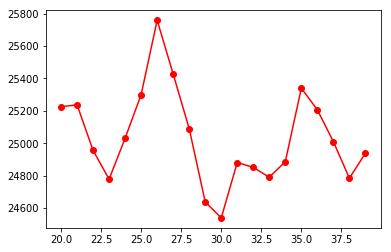

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan], dtype=float32)

In [18]:
# run trainLSTM
# trainLSTM( batchSize=32, timeStep=20, trainBegin=1000, trainEnd=1300, data=data)
# run prediction
prediction( timeStep=20, testBegin=1300, trainEnd=1400, data=data)